In [54]:
import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem
from scipy.stats import ttest_ind  

import scipy.stats as stats
import statsmodels.stats.api as sms

import pylab as plt
import seaborn as sns

from bayes import *

import warnings
warnings.simplefilter('ignore')

plt.rcParams['figure.figsize']=(15, 8)

from scipy.stats import bernoulli, beta   

In [55]:
# dividir por gate 30 o 40, y luego comparar x los 1-1 y 7-7

# gate 30 = control
# gate 40 = tto

In [56]:
# datos
cats_game = pd.read_csv('data/cookie_cats.csv')
cats_game.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [57]:
cats_game['version'].value_counts()

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

---

In [58]:
cats_game.groupby(['version', 'retention_1']).size()


version  retention_1
gate_30  False          24666
         True           20034
gate_40  False          25370
         True           20119
dtype: int64

In [59]:
# los datos son conocidos : impresiones y conversiones para test y control
# retention_1

imps_ctrl1, convs_ctrl1 = 44700, 20034   # entrar, comprar

imps_test1, convs_test1 = 45489, 20119


CR_ctrl1 = convs_ctrl1/imps_ctrl1
CR_test1 = convs_test1/imps_test1

f'Tasas retention_1: Control: {CR_ctrl1}, Test: {CR_test1}'
# resultado es el % de los valores aportados

'Tasas retention_1: Control: 0.4481879194630872, Test: 0.44228274967574577'

---

In [60]:
cats_game.groupby(['version', 'retention_7']).size()

version  retention_7
gate_30  False          36198
         True            8502
gate_40  False          37210
         True            8279
dtype: int64

In [61]:
# los datos son conocidos : impresiones y conversiones para test y control
# retention_7

imps_ctrl2, convs_ctrl2 = 44700, 8502   # entrar, comprar

imps_test2, convs_test2 = 45489, 8279


CR_ctrl2 = convs_ctrl2/imps_ctrl2
CR_test2 = convs_test2/imps_test2

f'Tasas retention_7: Control: {CR_ctrl2}, Test: {CR_test2}'
# resultado es el % de los valores aportados

'Tasas retention_7: Control: 0.19020134228187918, Test: 0.18200004396667327'

---

In [62]:
# a prioris
# retention_1

a_C, b_C = 1+convs_ctrl1, 1+imps_ctrl1-convs_ctrl1 #(impresiones menos conversiones)

a_T, b_T = 1+convs_test1, 1+imps_test1-convs_test1


beta_control1 = beta(a_C, b_C)

beta_test1 = beta(a_T, b_T)

In [63]:
beta_control1.mean(), beta_test1.mean() # esto es lo mismo q arriba, me estoy repitiendo, no confundir!!

(0.44819023757326293, 0.44228528719966587)

In [64]:
x=np.linspace(0.43, 0.46, 100)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

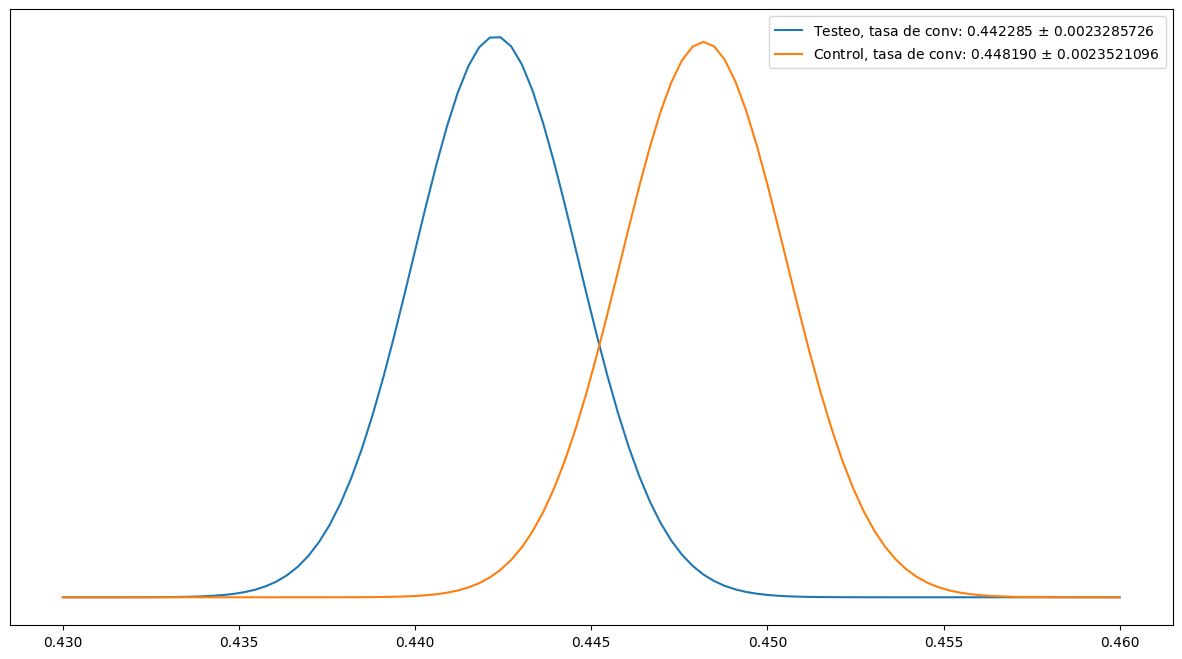

In [65]:
plot([beta_test1, beta_control1], ['Testeo', 'Control'])

In [66]:
salto = (beta_control1.mean() - beta_test1.mean())/beta_control1.mean()
salto

0.013175098158249857

In [67]:
prob = beta_test1.cdf(0.445) # este valor es la mitad de del punto donde convergen los dos gráficcos en eje x, este valor lo he puesto de manera visual aproximada
prob # quiero ver hasta donde llega el test y lo comparas con el cdf

0.8781293616836601

El test aumenta la tasa de conversión en un 1,32%, con una probabilidad del 88%.
El resultado de 87,81% indica la probabilidad de que el test1 pueda ser cierto.

---

In [68]:
# a prioris
# retention_7

a_C, b_C = 1+convs_ctrl2, 1+imps_ctrl2-convs_ctrl2 #(impresiones menos conversiones)

a_T, b_T = 1+convs_test2, 1+imps_test2-convs_test2


beta_control2 = beta(a_C, b_C)

beta_test2 = beta(a_T, b_T)

In [69]:
beta_control2.mean(), beta_test2.mean()  # esto es lo mismo q arriba, me estoy repitiendo, no confundir!!

(0.19021520289919913, 0.18201402475214878)

In [76]:
x=np.linspace(0.17, 0.2005, 100)

def plot(betas, nombres):
    
    for bet, nom in zip(betas, nombres):
        
        y=bet.pdf(x)
        y_media=bet.mean()
        y_std=bet.std()
        
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(nom, y_media, y_std))
        plt.yticks([])
        
    plt.legend()
    plt.show();

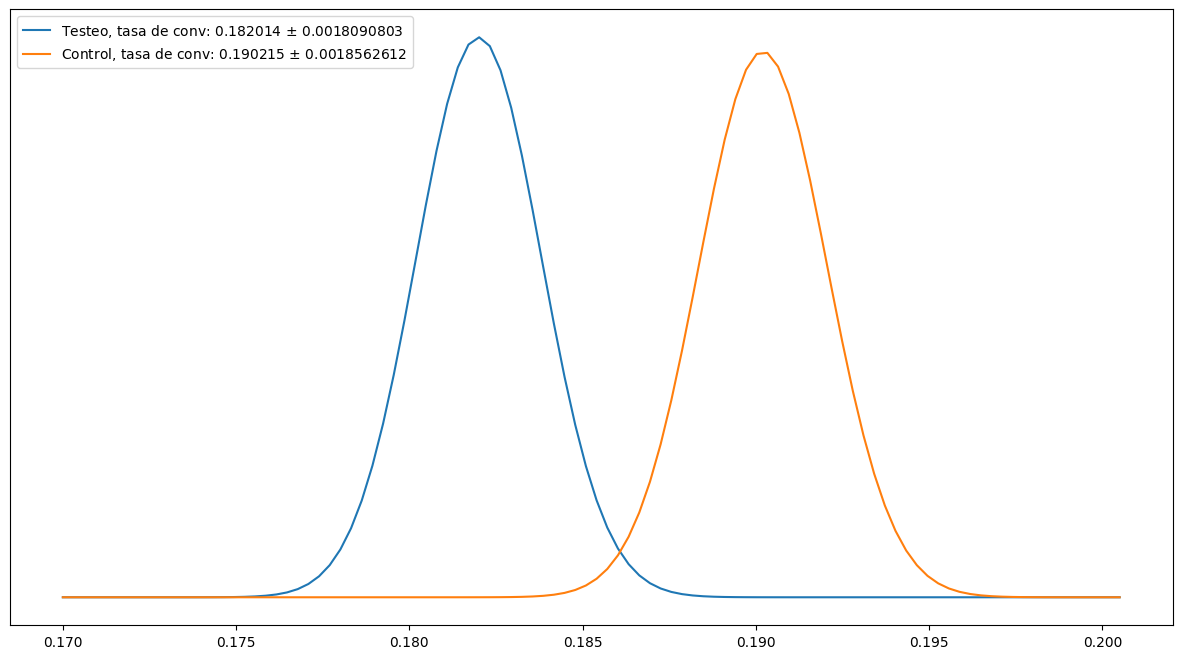

In [77]:
plot([beta_test2, beta_control2], ['Testeo', 'Control'])

In [79]:
salto = (beta_control2.mean() - beta_test2.mean())/beta_control2.mean()
salto

0.04311526114658881

In [78]:
prob = beta_test2.cdf(0.1865) # este valor es la mitad de del punto donde convergen los dos gráficcos en eje x, este valor lo he puesto de manera visual aproximada
prob # quiero ver hasta donde llega el test y lo comparas con el cdf

0.99318078791375

El test aumenta la tasa de conversión en un 1,32%, con una probabilidad del 99%.
El resultado de 99,32% indica la probabilidad de que el test2 pueda ser cierto.

---